In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import directed_hausdorff
from scipy.spatial import cKDTree

In [66]:
test=np.load("test_points.npy")
check=np.load("check_points.npy")

In [67]:
x, y=test[0]
test=test-np.array([x, y])

w, z=check[0]
check=check-np.array([w, z])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


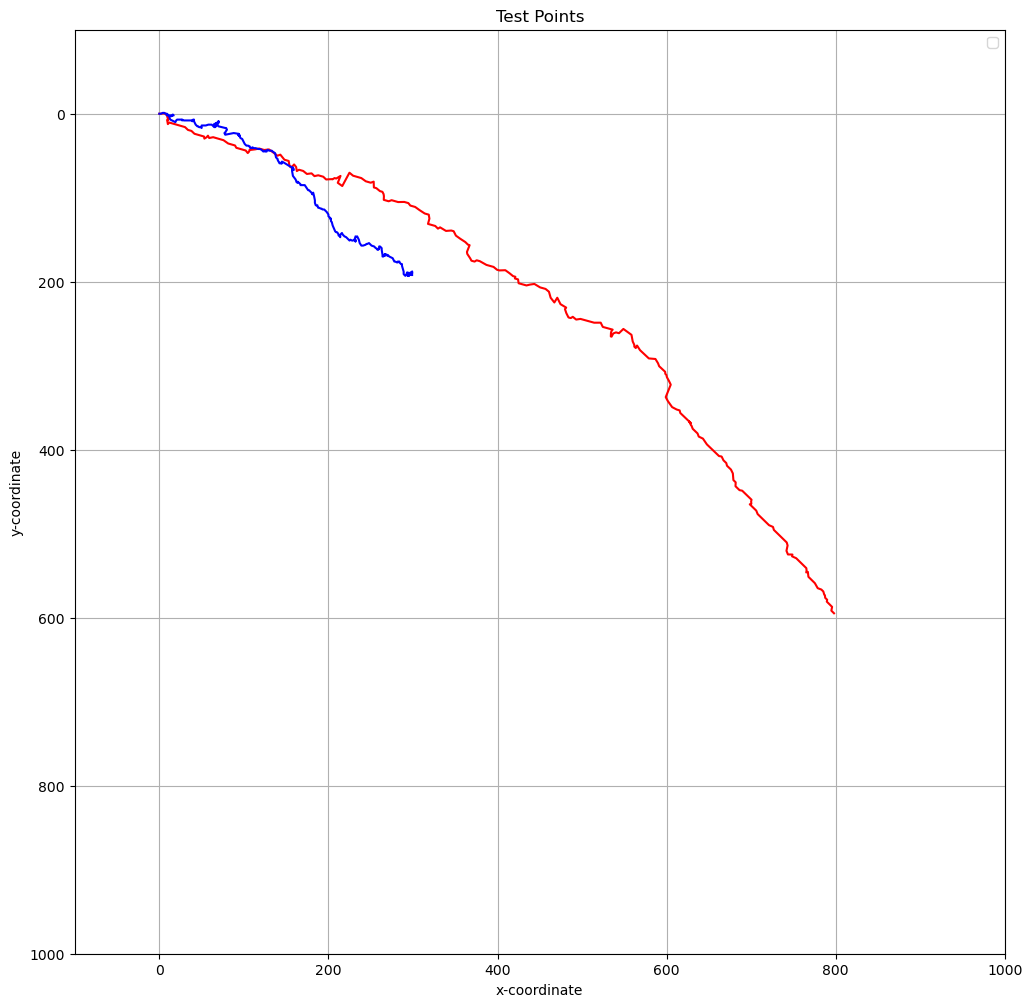

In [68]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(test[:, 0], test[:, 1], 'r')
plt.plot(check[:, 0], check[:, 1], 'b')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [69]:
# Scaling is done to get the end points same
# Compute scaling factors
scale_x=np.max(test[:, 0])/np.max(check[:, 0])
scale_y=np.max(test[:, 1])/np.max(check[:, 1])

# Apply scaling transformation
check=check*np.array([scale_x, scale_y])

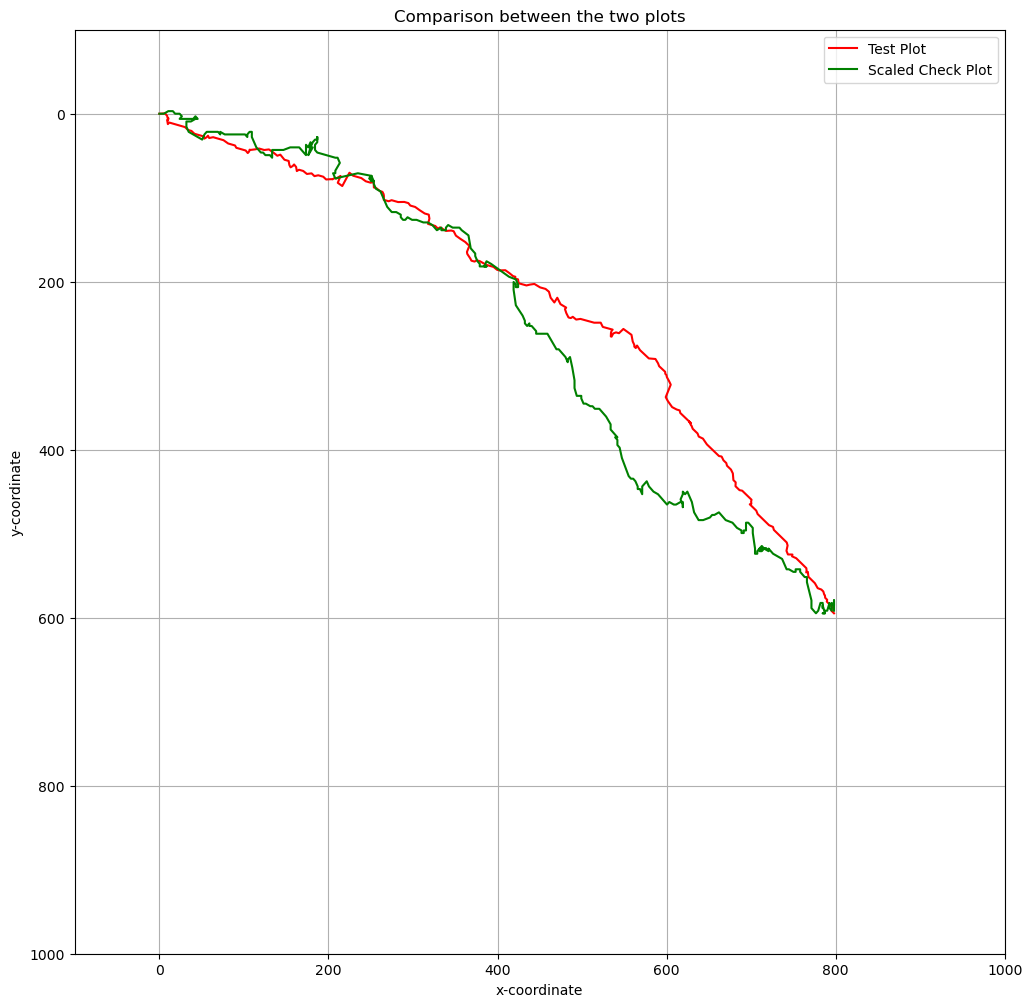

In [70]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(test[:, 0], test[:, 1], 'r', label="Test Plot")
plt.plot(check[:, 0], check[:, 1], 'g', label="Scaled Check Plot")
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.legend()
plt.title('Comparison between the two plots')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [71]:
# 1. Haussdorf Similarity
def hausdorff_similarity(a, b):
    d1=directed_hausdorff(a, b)[0]  # Distance A → B
    d2=directed_hausdorff(b, a)[0]  # Distance B → A
    hausdorff_dist=max(d1, d2)      # Maximum of both
    max_possible_dist=np.linalg.norm(np.max(a, axis=0)-np.min(a, axis=0))
    return 100*(1-hausdorff_dist/max_possible_dist)

# 2. Chamfer Similarity
def chamfer_similarity(a, b):
    tree_a=cKDTree(a)
    tree_b=cKDTree(b)
    dist_a_to_b, _=tree_a.query(b)  # Closest distances from B to A
    dist_b_to_a, _=tree_b.query(a)  # Closest distances from A to B
    chamfer_dist=np.mean(dist_a_to_b) + np.mean(dist_b_to_a)
    max_possible_dist=np.linalg.norm(np.max(a, axis=0)-np.min(a, axis=0))
    return 100*(1-chamfer_dist/max_possible_dist)

In [72]:
# Measure the similarity among the two shapes
hausdorff=hausdorff_similarity(test, check)
chamfer=chamfer_similarity(test, check)
print(f"Shape Similarity (Hausdorff-based): {hausdorff:.2f}%")
print(f"Shape Similarity (Chamfer-based): {chamfer:.2f}%")

Shape Similarity (Hausdorff-based): 90.37%
Shape Similarity (Chamfer-based): 94.62%


In [73]:
test2=np.load("test_points_2.npy")
check2=np.load("check_points.npy")

In [74]:
x, y=test2[0]
test2=test2-np.array([x, y])

w, z=check2[0]
check2=check2-np.array([w, z])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


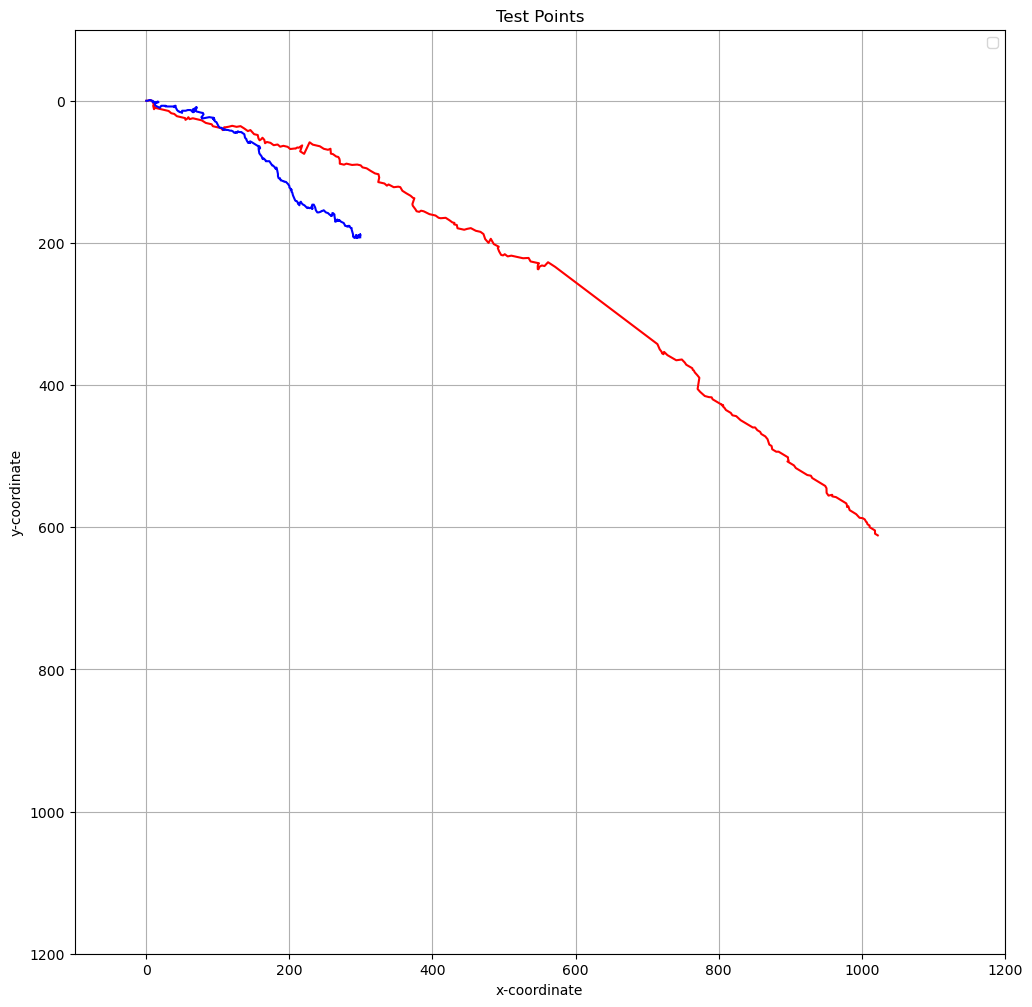

In [75]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(test2[:, 0], test2[:, 1], 'r')
plt.plot(check2[:, 0], check2[:, 1], 'b')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [76]:
# Scaling is done to get the end points same
# Compute scaling factors
scale_x=np.max(test2[:, 0])/np.max(check2[:, 0])
scale_y=np.max(test2[:, 1])/np.max(check2[:, 1])

# Apply scaling transformation
check2=check2*np.array([scale_x, scale_y])

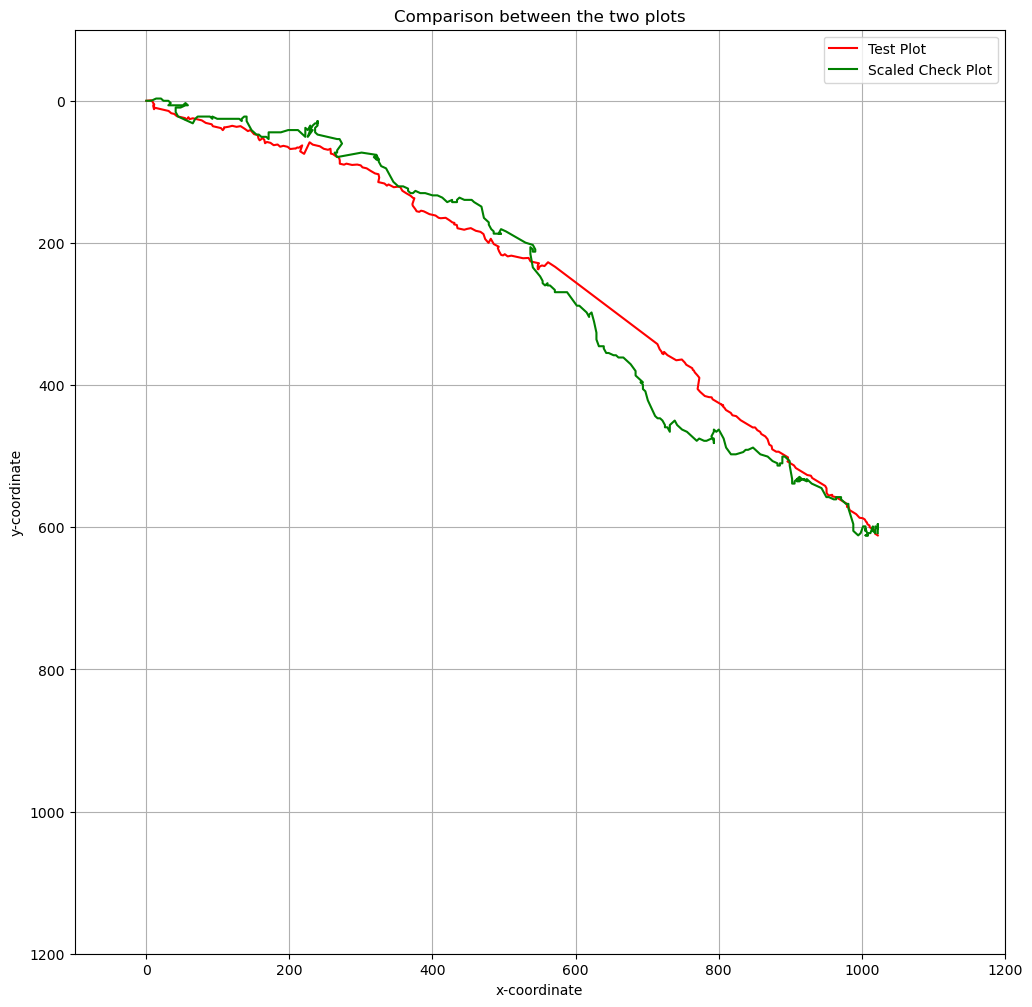

In [77]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(test2[:, 0], test2[:, 1], 'r', label="Test Plot")
plt.plot(check2[:, 0], check2[:, 1], 'g', label="Scaled Check Plot")
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Comparison between the two plots')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [78]:
# Measure the similarity among the two shapes
hausdorff=hausdorff_similarity(test2, check2)
chamfer=chamfer_similarity(test2, check2)
print(f"Shape Similarity (Hausdorff-based): {hausdorff:.2f}%")
print(f"Shape Similarity (Chamfer-based): {chamfer:.2f}%")

Shape Similarity (Hausdorff-based): 92.11%
Shape Similarity (Chamfer-based): 96.58%
